## Observations and Insights 

In [126]:
##################################################################
##
##   Matplotlib Homework - The Power of Plots
##
##        Author: George Alonzo
##     Due Date: October 2, 2021
##
##################################################################

In [127]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [128]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)  #249 Rows
print(f"There are {len(mouse_metadata)} rows in the mouse metadata file")
#mouse_metadata.head()

There are 249 rows in the mouse metadata file


In [129]:
study_results = pd.read_csv(study_results_path) #1893 Rows
print(f"There are {len(study_results)} rows in the study_results file")
#study_results.head()

There are 1893 rows in the study_results file


In [130]:
# Combine the data into a single dataset
combined_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how='left')

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [131]:
# Checking the number of mice.

print(f"There are {len(combined_df)} rows in the combined dataframe")

There are 1893 rows in the combined dataframe


In [132]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Create dataframe of Mouse ID and Timepoint as other columns may make the rows unique
mouse_timepoint = combined_df[["Mouse ID","Timepoint"]]
mouse_dups = mouse_timepoint[mouse_timepoint.duplicated()]
mouse_dups

,Mouse ID,Timepoint
137,g989,0
360,g989,5
681,g989,10
869,g989,15
1111,g989,20


In [133]:
# Optional: Get all the data for the duplicate mouse ID. 

g989_data = combined_df[combined_df["Mouse ID"] == "g989"]
print(f"There are {len(g989_data)} duplicated rows")
g989_data

There are 13 duplicated rows


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [134]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_study_results = combined_df[combined_df["Mouse ID"] != "g989"]

In [135]:
# Checking the number of mice in the clean DataFrame.

unique_mouse_count = len(clean_study_results["Mouse ID"].unique())
print(f"There are {len(clean_study_results)} rows in the new, cleaned dataframe, consisting of {unique_mouse_count} unique mice")

There are 1880 rows in the new, cleaned dataframe, consisting of 248 unique mice


## Summary Statistics

In [136]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# Create a df of only the required fields
regimen_stats = clean_study_results[["Drug Regimen","Tumor Volume (mm3)"]]
regimen_stats = regimen_stats.rename(columns = {"Tumor Volume (mm3)" : "Tumor Volume"})

# Create a group of a summary statistics table
regimen_group = regimen_stats.groupby(["Drug Regimen"]).mean()
regimen_group.columns = ["Mean Tumor Volume"]
regimen_group["Median Tumor Volume"] = regimen_stats.groupby(["Drug Regimen"]).median()
regimen_group["Tumor Volume Variance"] = regimen_stats.groupby(["Drug Regimen"]).var()
regimen_group["Tumor Volume Std. Dev."] = regimen_stats.groupby(["Drug Regimen"]).std()
regimen_group["Tumor Volume Std. Err."] = regimen_stats.groupby(["Drug Regimen"]).sem()
regimen_group

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [137]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

regimen_agg_group = regimen_stats.groupby('Drug Regimen').agg(['mean','median','var','std','sem'])
regimen_agg_group

Tumor Volume                                          
                     mean     median        var       std       sem
Drug Regimen                                                       
Capomulin       40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin        52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol       52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril        55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol        54.331565  52.509285  66.173479  8.134708  0.596466
Placebo         54.033581  52.288934  61.168083  7.821003  0.581331
Propriva        52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane        40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn        54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol       53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:title={'center':'Timepoints for Each Drug Regimen'}, xlabel='Drug Regimen', ylabel='Total Number of Measurements'>

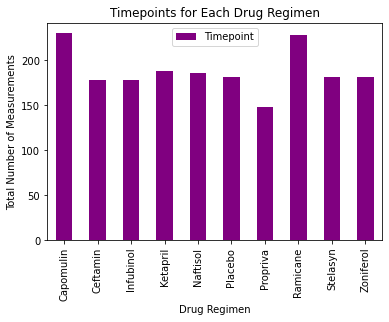

In [138]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

regimen_groups = clean_study_results.groupby("Drug Regimen")
timepoint_groups = regimen_groups["Timepoint"].count()
regimen_tp_df = pd.DataFrame(timepoint_groups)
regimen_tp_df.plot.bar(y="Timepoint",color="purple",title="Timepoints for Each Drug Regimen",
                   ylabel="Total Number of Measurements")

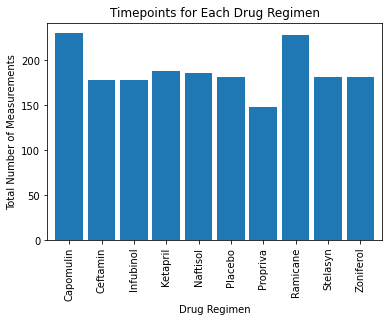

In [139]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

regemin_bar = timepoint_groups.plot(kind="bar",title="Timepoints for Each Drug Regimen",width=0.85)
regemin_bar.set_xlabel("Drug Regimen")
regemin_bar.set_ylabel("Total Number of Measurements")
regemin_bar.set_ylabel("Total Number of Measurements")
plt.show()

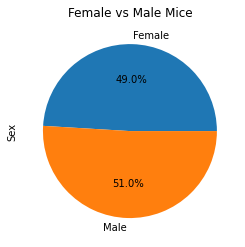

In [142]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_df = clean_study_results[["Sex"]]

sex_groups = sex_df.groupby("Sex")
sex_counts = sex_groups["Sex"].count()
sex_chart = sex_counts.plot(kind="pie",title="Female vs Male Mice",autopct="%1.1f%%")

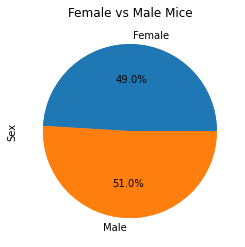

In [143]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex_counts.plot(kind="pie",title="Female vs Male Mice")
plt.pie(sex_counts, autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [145]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Using a drug list to make this more dynamic, looping, printing labels, etc.  
# More drugs can be added to the list if needed.
# Box Plot exercise would need modification, though.
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse
mouse_timepoints = clean_study_results[["Drug Regimen", "Mouse ID","Timepoint","Tumor Volume (mm3)"]]
max_tp_group_all = mouse_timepoints.loc[mouse_timepoints.groupby("Mouse ID")["Timepoint"].idxmax()]
max_tp_group_all = max_tp_group_all.rename(columns = {"Tumor Volume (mm3)" : "Tumor Volume"})

# Split above to just the ones having regimens in the drug list
max_tp_group = max_tp_group_all.loc[(max_tp_group_all["Drug Regimen"].isin(drug_list))]
max_tp_group.set_index("Drug Regimen")

,Mouse ID,Timepoint,Tumor Volume
Drug Regimen,,,
Infubinol,a203,45,67.973419
Infubinol,a251,45,65.525743
Ceftamin,a275,45,62.999356
Ramicane,a411,45,38.407618
Ramicane,a444,45,43.047543
...,...,...,...
Ceftamin,y769,45,68.594745
Capomulin,y793,45,31.896238
Ceftamin,y865,45,64.729837


In [147]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol = []
outliers = []
   
for drug in drug_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes    
    tumor_vol = max_tp_group.loc[max_tp_group["Drug Regimen"] == drug]["Tumor Volume"]
    # Calculate the IQR and quantitatively determine if there are any potential outliers.
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Determine outliers using upper and lower bounds
    for vol in tumor_vol:
        if vol < lower_bound or vol > upper_bound:
            outliers.append(vol)

    print(f"{drug}'s Lower Boundary={lower_bound} | Upper Boundary={upper_bound}")       
    print(f"{drug}'s potential outliers: {outliers}\n")
    tumor_vol = []
    outliers = []

Capomulin's Lower Boundary=20.70456164999999 | Upper Boundary=51.83201549
Capomulin's potential outliers: []

Ramicane's Lower Boundary=17.912664470000003 | Upper Boundary=54.30681135
Ramicane's potential outliers: []

Infubinol's Lower Boundary=36.83290494999999 | Upper Boundary=82.74144559000001
Infubinol's potential outliers: [36.3213458]

Ceftamin's Lower Boundary=25.355449580000002 | Upper Boundary=87.66645829999999
Ceftamin's potential outliers: []



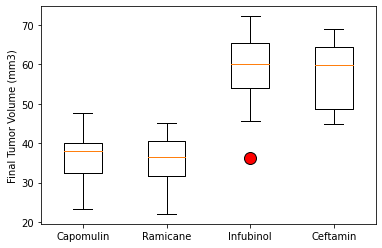

In [148]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

capomulin_data_l = max_tp_group.loc[max_tp_group["Drug Regimen"] == "Capomulin"]["Tumor Volume"].tolist()
ramicane_data_l = max_tp_group.loc[max_tp_group["Drug Regimen"] == "Ramicane"]["Tumor Volume"].tolist()
infubinol_data_l = max_tp_group.loc[max_tp_group["Drug Regimen"] == "Infubinol"]["Tumor Volume"].tolist()
ceftamin_data_l = max_tp_group.loc[max_tp_group["Drug Regimen"] == "Ceftamin"]["Tumor Volume"].tolist()
## WOULD NEED TO ADD ADDITIONAL DFs FOR EACH DRUG ADDED TO THE DRUG LIST ABOVE, FOR FUTURE ANALYSIS

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
## WOULD NEED TO ADD ADDITIONAL DFs FOR EACH DRUG ADDED TO THE DRUG LIST ABOVE, FOR FUTURE ANALYSIS
data = capomulin_data_l, ramicane_data_l, infubinol_data_l, ceftamin_data_l

flierprops = dict(marker='o', markerfacecolor='red', markersize=12,
                  linestyle='none', markeredgecolor='black')
ax1.boxplot(data, flierprops=flierprops)

plt.xticks([1,2,3,4],drug_list)
plt.show()

## Line and Scatter Plots

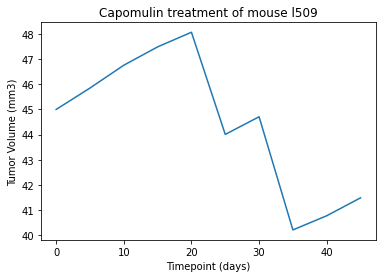

In [149]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Set Drug & Mouse ID here for slicing dataframes, chart tiles, labels, etc.
drug="Capomulin"
mouse="l509"

# Grab all rows relating to the drug specified above
drug_df = clean_study_results[clean_study_results["Drug Regimen"] == drug]
# Grab all rows relating to the mouse specified above
mouse_drug_df = drug_df[drug_df["Mouse ID"] == mouse]
plt.title(f"{drug} treatment of mouse {mouse}")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(mouse_drug_df["Timepoint"],mouse_drug_df["Tumor Volume (mm3)"])
plt.show()

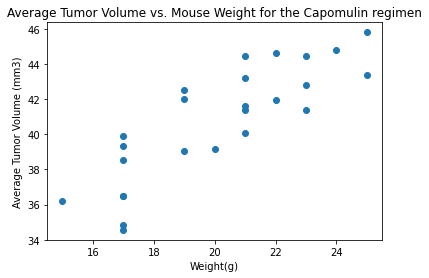

In [150]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Reuse previous dataframe with drug variable and get averages (Note: weight is static)
# (only Weight & Tumor averages will be used)
avg_weight_vol_group = drug_df.groupby(["Mouse ID"]).mean()

x_values = avg_weight_vol_group["Weight (g)"]
y_values = avg_weight_vol_group["Tumor Volume (mm3)"]

plt.title(f"Average Tumor Volume vs. Mouse Weight for the {drug} regimen")
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.scatter(x_values,y_values)
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume for Capomulin is 0.84


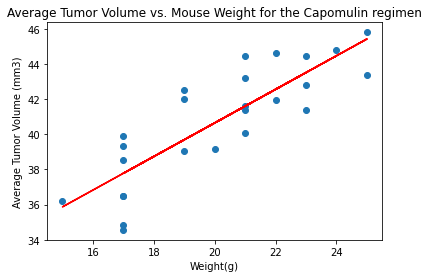

In [151]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between mouse weight and the average tumor volume for {drug} is {round(correlation[0],2)}")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title(f"Average Tumor Volume vs. Mouse Weight for the {drug} regimen")
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

Three observations or insights about the data:

1) For the four sampled drugs, only one datapoint (for Infubinol) is an outlier.

2) Using the drug Capomulin as an example, there may not be enough timepoints to determine the long-term effectiveness of the drug.  Randomly sampling some mice:  There appears to be an overall downward trend in the tumor volume over time.  Some mice, such as j119, for example, seems to have its tumor volume continuing on a downward trend at day 45 while some mice, such as l509, start to slightly increasing.

3) There is a strong correlation (0.84) between mouse weight and Average Tumor Volume for the Capomulin regimen (which is >0.7).

NOTE:  When determining outliers using upper and lower bounds, the example provided to us shows that the Drug Regimen Infubinol's potential outliers are 31 & 36.321346.  My data only produced one outlier: 36.3213458.  I checked the raw data and there was no value of 31 for *any* of the timepoints.  The value I found is the least for this drug regimen (Mouse ID c326, timepoint 5).